In [6]:
!pip install tensorflow 

In [183]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [223]:
model = tf.keras.models.load_model(r'a:\ML\OWN_PROJECT\14_fashion\PACKAGE\MODEL')

In [246]:
class Validation:
    
    def __init__(self, model):
        
        self.ROOT = pathlib.Path.cwd()/'PACKAGE'
        self.DATASET_DIR = self.ROOT/'DATASET'
        self.MODEL_DIR = self.ROOT/'MODEL'
        
        self.model = model
        self.dataset = {'train':[], 'test':[]}
        self.dataset_class = None
        self.class_num = None
        self.class_dataset = None
        
    def data_load(self):
        temp = ['X_train.pkl', 'y_train.pkl', 'X_test.pkl', 'y_test.pkl']
        for data in temp[:2]:
            with open(self.DATASET_DIR/data, 'rb') as file:
                self.dataset['train'].append(pickle.load(file))
        for data in temp[2:]:
            with open(self.DATASET_DIR/data, 'rb') as file:
                self.dataset['test'].append(pickle.load(file))        
        del temp
        
        self.dataset['train'][0] = self.dataset['train'][0]/255
        self.dataset['test'][0] = self.dataset['test'][0]/255
        
    def model_load(self):
        self.model = tf.keras.models.load_model(self.MODEL_DIR)
        
        
    def show_set(self):
        fig = plt.figure(figsize = (12,12))
        for i in range(1, 17):
            random = np.random.randint(low = 0, high = len(self.dataset['train'][0]))
            ax = fig.add_subplot(4, 4, i)
            ax.imshow(self.dataset['train'][0][random])
            ax.axis('off')
            prediction = self.model.predict(np.array(self.dataset['train'][0][random]).reshape(1,28,28,1)).argmax()
            ax.set_title('True = {0}\nPrediction = {1}'.format(self.dataset['train'][1][random], prediction),
                        fontsize = 14, color = 'white', fontweight = 'bold')
        plt.subplots_adjust(wspace = 0, hspace = 0.4)
        plt.show()
       
    def dataset_validation(self, X, y, dataset):
        X = tf.expand_dims(X, axis = 3)
        y_pred = self.model.predict(X)
        y_pred = np.array([i.argmax() for i in y_pred])

        recall = round(recall_score(y, y_pred, average = 'micro') * 100, ndigits = 2)
        precision = round(precision_score(y, y_pred, average = 'micro') * 100, ndigits = 2)
        accuracy = round(accuracy_score(y, y_pred) * 100, ndigits = 2)
        
        print('_________________________________')
        print('Accuracy of {0} set = {1}%'.format(dataset, accuracy))
        print('Precision of {0} set = {1}%'.format(dataset, precision))
        print('Recall of {0} set = {1}%'.format(dataset, recall))

        
    
    def class_validation(self, X, y, class_):
        X = np.array(X).reshape(-1,28,28,1)
        y_pred = self.model.predict(X)
        y_pred = np.array([i.argmax() for i in y_pred])

        accuracy = round(accuracy_score(y, y_pred) * 100, ndigits = 2)
        
        print('_________________________________')
        print('Accuracy for class {0}  = {1}%'.format(class_, accuracy))
        print(y)
        print(y_pred)

    
    def split_data_on_class(self):
        all_image = tf.concat((self.dataset['train'][0], self.dataset['test'][0]), axis = 0)
        all_labels = np.concatenate((self.dataset['train'][1], self.dataset['test'][1]), axis = 0)
        self.class_num = len(set(all_labels))
        
        class_count = {label:0 for label in range(0, self.class_num)}
        
        for label in all_labels:
            class_count[label] += 1
        
        self.class_dataset = {label:tf.zeros(shape = (1,28,28), dtype = 'float32') for label in class_count.keys()}
        for index, image in enumerate(all_image[:100], start = 0):
            label = all_labels[index]
            self.class_dataset[label] = tf.concat((self.class_dataset[label],
                                              tf.cast(tf.expand_dims(image, axis = 0), dtype='float32')),
                                                axis = 0)
        
        for _class in self.class_dataset.keys():
            self.class_dataset[_class] = self.class_dataset[_class][1:]
    
    def proceed_validation(self):
        self.data_load()
        self.model_load()
        self.show_set()
        self.dataset_validation(self.dataset['train'][0][:200], self.dataset['train'][1][:200], 'Train')
        self.dataset_validation(self.dataset['test'][0][:200], self.dataset['test'][1][:200], 'Test')
        self.split_data_on_class()
        
        for i in self.class_dataset.keys():
            y_true = np.array([i for number in range(0, len(self.class_dataset[i]))])
            self.class_validation(X = self.class_dataset[i], y = y_true, class_ = i)
            
        
        
                
                

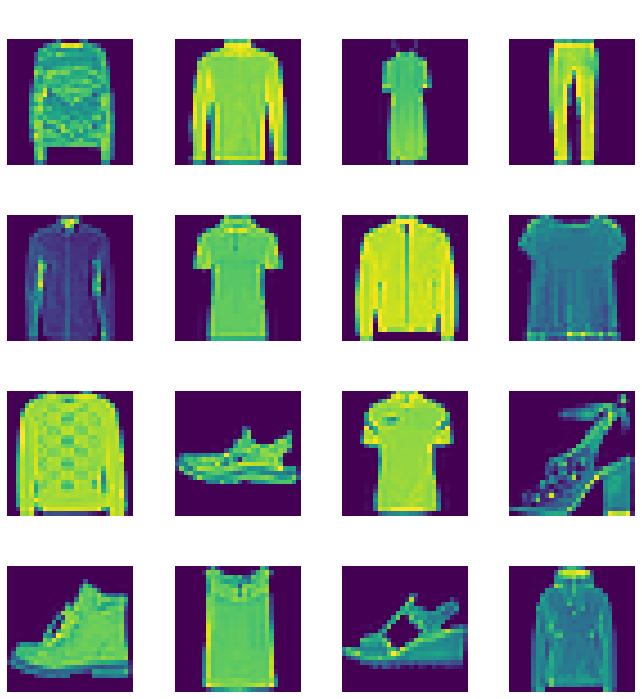

In [247]:
obj1 = Validation(model)
obj1.proceed_validation()